In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
df=pd.read_csv("/content/sentiment_tweets3.csv")

In [3]:
df.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [4]:
df.rename(columns = {'message to examine':'message', 'label (depression result)':'label'}, inplace = True)

In [5]:
df.shape

(10314, 3)

In [6]:
df.isnull().sum()

Index      0
message    0
label      0
dtype: int64

In [7]:
df.label.value_counts()

0    8000
1    2314
Name: label, dtype: int64

In [8]:
2314/(8000+2314)

0.2243552452976537

In [9]:
# data class seems imbalanced

In [10]:
df['word_count']=df['message'].apply(lambda x: len(x.split()))

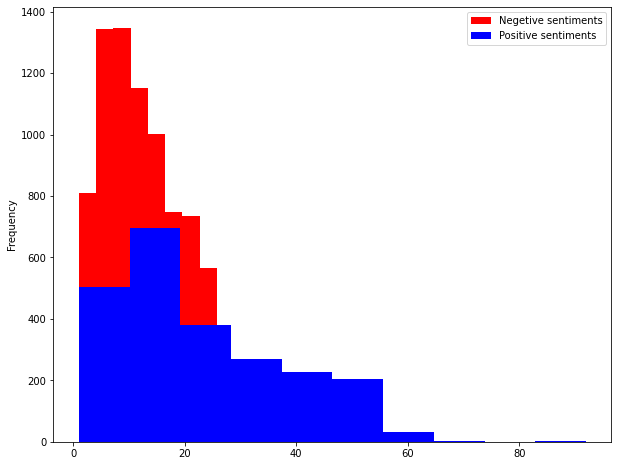

In [11]:
plt.figure(figsize=(10,8))
df[df.label==0].word_count.plot(bins=10,kind='hist',color='red',label='Negetive sentiments')
df[df.label==1].word_count.plot(bins=10,kind='hist',color='blue',label='Positive sentiments')
plt.legend()

In [12]:
# Checking out maximum and minimum of tweet lenght

In [13]:
print(df['word_count'].max())
print(df['word_count'].min())

92
1


In [14]:
print("Minumum length of tweet: \n",df['message'][df.word_count==1][:5])
print("Miximum word present in tweet: \n",df['message'][df.word_count==92])



Minumum length of tweet: 
 156       @RealWorldMom 
175             around. 
263    @JonathanRKnight 
809          @llisalang 
921           ferngully 
Name: message, dtype: object
Miximum word present in tweet: 
 9410    @doucefeline @WhatASaviour7 @alisawoodard6 @SW...
Name: message, dtype: object


In [15]:
data=df.drop(['Index','label','word_count'],axis=1)
data.head()

,message
0,just had a real good moment. i missssssssss hi...
1,is reading manga http://plurk.com/p/mzp1e
2,@comeagainjen http://twitpic.com/2y2lx - http:...
3,@lapcat Need to send 'em to my accountant tomo...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder


In [16]:
label=df.label
label.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [17]:
from tensorflow.keras.layers import Embedding,LSTM,Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot 

In [18]:
# defining maximum vocabulary size
# data preprocessing 

In [19]:
voc_size=5000

In [20]:
import nltk
import re
from nltk.corpus import stopwords

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
corpus=[]
for i in range(0,len(data)):
  review=re.sub('[^a-zA-Z]',' ',data['message'][i])
  review=review.lower()
  review=review.split()

  review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
  review=' '.join(review)
  corpus.append(review)

In [24]:
corpus

['real good moment missssssssss much',
 'read manga http plurk com p mzp e',
 'comeagainjen http twitpic com lx http www youtub com watch v zogfqvh',
 'lapcat need send em account tomorrow oddli even refer tax support evid though',
 'add myspac myspac com lookthund',
 'sleepi good time tonight though',
 'silkcharm nbn someon alreadi said fiber home mean least regular',
 'c possibl today nice',
 'nite twittervil workout ciao',
 'danann night darlin sweet dream',
 'good morn everybodi',
 'final creat wordpress blog alreadi blog seattl coffe commun http tinyurl com c uufd',
 'kisha cnt get u til get frm u rememb ur top',
 'nicolerichi ye rememb band awesom pleas repli',
 'realli love reflect shadow',
 'blueaero ooo fantasi like fantasi novel check',
 'rokchic prob sell noth blog http snedwan com get listen band itun',
 'shipovalov quot nokla connect peopl quot',
 'stay late start earli good thing like job',
 'kal penn read new job congratul fantast',
 'abl sleep think watch ugli betti onl

In [25]:
corpus[1]

'read manga http plurk com p mzp e'

In [26]:
# Using one hot,finding out word index present in sentence

In [27]:
onehot_rep=[one_hot(words,voc_size) for words in corpus]
onehot_rep[:5]

[[2016, 1912, 591, 2132, 372],
 [853, 4362, 2814, 777, 592, 801, 4130, 2889],
 [1154, 2814, 2383, 592, 1222, 2814, 27, 3437, 592, 2422, 2665, 473],
 [4306, 1523, 1397, 857, 2254, 3214, 1563, 664, 1004, 474, 3365, 3247, 4505],
 [1506, 775, 775, 592, 742]]

In [28]:
# Using pad sequence for equal in word lenght size 

In [29]:
sent_length=90
embedded_docs=pad_sequences(onehot_rep,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ...  591 2132  372]
 [   0    0    0 ...  801 4130 2889]
 [   0    0    0 ... 2422 2665  473]
 ...
 [   0    0    0 ... 2814  246 3312]
 [   0    0    0 ...  658 4955  857]
 [   0    0    0 ...    0    0    0]]


In [30]:
# transformation from word index to vector 

In [31]:
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 90, 40)            200000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [32]:
X_final=np.array(embedded_docs)
y_final=np.array(label)

In [33]:
X_final.shape,y_final.shape

((10314, 90), (10314,))

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
# Increasing weight of label 1 by 3 times

In [36]:
weights_assigned={0:1,1:300}

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X_final,y_final,test_size=0.2,random_state=15)

In [38]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=60,class_weight=weights_assigned)

Epoch 1/10
138/138 [==============================] - 5s 13ms/step - loss: 7.0911 - accuracy: 0.2315 - val_loss: 3.5630 - val_accuracy: 0.2021
Epoch 2/10
138/138 [==============================] - 1s 10ms/step - loss: 2.9082 - accuracy: 0.2823 - val_loss: 1.0830 - val_accuracy: 0.4741
Epoch 3/10
138/138 [==============================] - 1s 9ms/step - loss: 0.9741 - accuracy: 0.8129 - val_loss: 0.4736 - val_accuracy: 0.7833
Epoch 4/10
138/138 [==============================] - 1s 9ms/step - loss: 0.4196 - accuracy: 0.9544 - val_loss: 0.4893 - val_accuracy: 0.7659
Epoch 5/10
138/138 [==============================] - 1s 9ms/step - loss: 0.2706 - accuracy: 0.9653 - val_loss: 0.2023 - val_accuracy: 0.9443
Epoch 6/10
138/138 [==============================] - 1s 11ms/step - loss: 0.1835 - accuracy: 0.9823 - val_loss: 0.0808 - val_accuracy: 0.9830
Epoch 7/10
138/138 [==============================] - 1s 11ms/step - loss: 0.2153 - accuracy: 0.9771 - val_loss: 0.0711 - val_accuracy: 0.9811
Ep